### <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 15pt"> LEVERAGING MACHINE LEARNING FOR ENERGY USAGE PREDICTION IN CHICAGO: INSIGHTS FROM 2010 DATA </font><br /></span></strong></div>


> - <b>Name : CHAITHANYA.S.NAIR</b>
> - <b>Organization: Entri Elevate</b>
> - <b>Date : 20/09/2024</b>

## <font color='slateblue'><b>Table of Contents</font></b>
1. **Overview of Problem Statement:**
2. **Objective**
3. **Data Description**
4. **Data Collection**
5. **Data Preprocessing - Data Cleaning**
6. **Exploratory Data Analysis (EDA)**
7. **Feature Engineering**
8. **Feature Selection**
9. **Split Data into Training and Testing Sets**
10. **Feature Scaling**
11. **Build the ML Model** (at least 5)
12. **Model Evaluation**
13. **Hyperparameter Tuning**
14. **Save the Model**
15. **Test with Unseen Data**
16. **Interpretation of Results (Conclusion)**
17. **Future Work**

## <font color='SlateBlue'><b>1 . <u>Overview of Problem Statement</u></b></font>

Urban energy consumption is a significant factor in sustainability and environmental impact. With the city of Chicago's 2010 energy usage dataset, there is an opportunity to leverage machine learning to better understand the factors driving energy consumption and create predictive models to enhance energy efficiency. This data includes energy consumption across different sectors, building types, and locations, providing a rich source for analysis.
> <b> Problem Statement :</b>
The primary goal of this project is to predict building energy consumption in Chicago using machine learning techniques. By analyzing the data, we aim to address several critical challenges:
> - Can we accurately predict energy usage based on building attributes such as building size, type, location, and energy source?
> - What are the most significant factors influencing energy consumption patterns across different sectors in Chicago?
> - How can predictive models be used to inform more efficient energy management and policy decisions for urban planners?

## <font color='SlateBlue'><b>2. <u>Objective</b></u> </font>

The objective of this project is to leverage machine learning to predict energy consumption in Chicago's buildings using the 2010 energy usage dataset. By analyzing building attributes and energy consumption patterns, the project aims to:

> - Develop Accurate Predictive Models: Build machine learning models to predict energy usage based on building characteristics such as size, type, location, and energy source.

> - Identify Key Drivers of Energy Consumption: Uncover the most influential factors that contribute to higher or lower energy consumption across different sectors, such as residential, commercial, and industrial.

> - Generate Insights for Urban Planning: Provide actionable insights for city planners and policymakers on how building attributes impact energy consumption, offering recommendations for energy efficiency improvements.

> - Contribute to Sustainable Energy Management: Support the development of data-driven strategies for optimizing energy usage, promoting sustainability, and reducing the carbon footprint of urban areas.

This project will demonstrate how machine learning can be applied to real-world energy data to inform policy and urban development for more efficient and sustainable cities.

## <font color = 'SlateBlue'><b> 3. <u>Data Description</u></b>  </font>

The Chicago Energy Usage dataset contains detailed information on energy consumption across various building sectors in the city of Chicago for the year 2010. This dataset provides the foundation for predicting energy usage based on building characteristics. Below is a general description of the key data fields:

#### 1.Building ID
- A unique identifier for each building in the dataset.

#### 2.Building Type
- The type of building (e.g., residential, commercial, industrial). This helps categorize energy consumption patterns based on usage.

#### 3.Location:
- **Address**: The street address of the building.
- **Zip Code**: Postal code information, allowing for geographical segmentation.
- **Community Area**: Chicago’s community area (neighborhood) where the building is located.
- **Latitude/Longitude**: Geographic coordinates of the building, useful for spatial analysis.

#### 4.Energy Usage:
- **Electricity Consumption (kWh)**: The total amount of electricity consumed by the building in kilowatt-hours (kWh).
- **Natural Gas Consumption (Therms)**: The total natural gas consumed, measured in therms.
- **Total Energy Consumption (kBtu)**: The combined total energy consumed, converted to thousands of British thermal units (kBtu), which standardizes the different energy sources for comparison.

#### 5.Building Attributes:
- **Gross Floor Area (sq ft)**: The total area of the building, measured in square feet.
- **Year Built**: The year the building was constructed, which may influence energy efficiency based on construction standards at the time.
- **Building Age**: Calculated based on the year of construction, this field may impact the energy efficiency of the building.

#### 6.Energy Efficiency:
- **ENERGY STAR Rating**: A measure of the building's energy efficiency on a scale of 1-100. Higher scores indicate more efficient buildings.
- **Source EUI (Energy Use Intensity)**: The energy use per square foot of building space, measured in kBtu/sq ft. Lower EUI values generally reflect higher energy efficiency.

#### 7.Occupancy
- Information on whether the building is fully or partially occupied, which can influence energy demand.

This dataset serves as a rich source for understanding energy usage trends in urban areas and for building predictive models to estimate future consumption based on building characteristics.

<font color = 'Red'><u><b> Source of dataset</b></u> : </font>
> - Data.world Platform: The dataset is available on the data.world platform, where it has been curated for research and analysis purposes:
Chicago Energy Usage Dataset on data.world.
https://data.world/cityofchicago/energy-usage-2010

This dataset was originally collected by the city to monitor energy consumption and to provide insights that could support urban sustainability initiatives.

## <font color='SlateBlue'><b>4.<u> Data Collection</b> </u></font>

<font color= 'Orange'><b>a. Importing Necessary Libraries</b></font>

Import the necessary libraries for your machine learning tasks.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<font color= 'Orange'><b>b. Importing the dataset</b></font>

In [6]:
df = pd.read_csv('energy-usage-2010.csv')
df

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.00,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.00,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.00,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.00,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.00,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67046,Woodlawn,1.703184e+14,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,...,116.0,55.0,1.00,0.00,3.14,37.0,0.6727,26.0,0.7030,37.0
67047,Woodlawn,1.703184e+14,Commercial,Multi < 7,1005.0,1760.0,1521.0,1832.0,2272.0,2361.0,...,31.0,24.0,3.00,104.50,2.07,15.0,0.6250,13.0,0.8670,15.0
67048,Woodlawn,1.703184e+14,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,...,31.0,24.0,2.33,100.67,2.07,15.0,0.6250,13.0,0.8670,15.0
67049,Woodlawn,1.703184e+14,Residential,Single Family,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,...,0.0,0.0,1.00,0.00,0.00,0.0,NaN,0.0,NaN,0.0


## <font color='SlateBlue'>5.<u>Data Pre Processing</u></font>

#### Data Preprocessing Considerations:
- **Missing Values**: Some fields may have missing or inconsistent data, requiring imputation or removal of rows/columns.
- **Normalization**: Energy consumption values may need to be normalized based on building size or type to allow for fair comparisons.
- **Categorical Variables**: Fields like building type and community area will need to be encoded for use in machine learning models.
  Data cleaning is a crucial step in data preprocessing. It involves identifying and rectifying issues in raw data to ensure accuracy and reliability during model building and analysis.

<font color = 'Orange'><b>a. Examine the dataset</b></font>

tUse functions like head(), info(), and describe() to get an overview of the dataset.

In [7]:
df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

In [9]:
df.columns

Index(['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE',
       'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010',
       'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS',
       'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010',
       'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
       'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010',
       'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010',
       'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT',
       'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010',
       'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010',
       'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010',
       'KWH SQFT STANDARD DEV

In [5]:
df.describe()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,6.697400e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,...,67037.000000,67037.000000,67051.000000,67051.000000,67037.000000,67037.000000,64606.000000,67037.000000,64433.000000,67037.000000
mean,1.703140e+14,1.758159e+04,1.737651e+04,1.624212e+04,1.595696e+04,1.906623e+04,2.300485e+04,2.482891e+04,2.267526e+04,1.856410e+04,...,105.180169,48.375897,1.887592,71.593006,3.454721,42.347495,0.880365,25.438952,0.511679,42.347495
std,2.776392e+09,3.482508e+05,3.351910e+05,3.164713e+05,3.118232e+05,3.634429e+05,3.988582e+05,4.135955e+05,3.940989e+05,3.486212e+05,...,801.339175,426.941305,1.957215,34.168384,26.146208,371.024953,0.130937,251.193571,0.288431,371.024953
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.703116e+14,1.370000e+03,1.613000e+03,1.586000e+03,1.579000e+03,1.957000e+03,2.700000e+03,3.203000e+03,2.837750e+03,2.027000e+03,...,37.000000,15.000000,1.140000,53.000000,2.150000,13.000000,0.833200,3.000000,0.286000,13.000000
50%,1.703133e+14,3.481500e+03,3.814000e+03,3.681500e+03,3.646000e+03,4.528000e+03,6.295000e+03,7.389000e+03,6.413500e+03,4.573000e+03,...,64.000000,25.000000,1.750000,80.000000,2.700000,22.000000,0.914600,11.000000,0.537900,22.000000
75%,1.703167e+14,7.157000e+03,7.410250e+03,7.059000e+03,7.010000e+03,8.943500e+03,1.282850e+04,1.465750e+04,1.229800e+04,8.634000e+03,...,105.000000,42.000000,2.000000,96.500000,3.320000,37.000000,0.967700,23.000000,0.733000,37.000000
max,1.703198e+14,5.298534e+07,4.787976e+07,4.413646e+07,4.222055e+07,4.861925e+07,5.256908e+07,5.513983e+07,5.158912e+07,4.450386e+07,...,67388.000000,51372.000000,110.000000,158.000000,2061.920000,43222.000000,1.000000,28335.000000,1.000000,43222.000000


<font color='Orange'><b>b. Finding Missing Values</b></font>


Identify missing values using functions like isnull().sum().

In [3]:
missing_values = df.isnull().sum()
missing_values

COMMUNITY AREA NAME                      0
CENSUS BLOCK                            77
BUILDING TYPE                           77
BUILDING_SUBTYPE                        77
KWH JANUARY 2010                       871
                                      ... 
OCCUPIED UNITS                          14
OCCUPIED UNITS PERCENTAGE             2445
RENTER-OCCUPIED HOUSING UNITS           14
RENTER-OCCUPIED HOUSING PERCENTAGE    2618
OCCUPIED HOUSING UNITS                  14
Length: 73, dtype: int64

<font color='Orange'><b>c. Handle missing values</b></font>

Impute missing values

<b><u>Using Imputer For Numerical Column</u></b>

In [3]:
from sklearn.impute import SimpleImputer
num_col = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
df[num_col] = imputer_num.fit_transform(df[num_col])


<b><u>Using Imputer for Categorical column</b></u>

In [4]:
cat_col = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')  
df[cat_col] = imputer_cat.fit_transform(df[cat_col])

<b>checking for missing values</b>

In [5]:
print(df.isnull().sum())


COMMUNITY AREA NAME                   0
CENSUS BLOCK                          0
BUILDING TYPE                         0
BUILDING_SUBTYPE                      0
KWH JANUARY 2010                      0
                                     ..
OCCUPIED UNITS                        0
OCCUPIED UNITS PERCENTAGE             0
RENTER-OCCUPIED HOUSING UNITS         0
RENTER-OCCUPIED HOUSING PERCENTAGE    0
OCCUPIED HOUSING UNITS                0
Length: 73, dtype: int64


<font color='Orange'><b>d. Remove duplicates</b></font>

In [6]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


<font color='Orange'><b>e.Outliers Handling</font></b>

In [7]:
print("Shape of dataset before removing outliers:",df.shape)

Shape of dataset before removing outliers: (67051, 73)


In [8]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    lower_percentile = df[col].quantile(0.01)
    upper_percentile = df[col].quantile(0.99)
    df = df[(df[col] >= lower_percentile) & (df[col] <= upper_percentile)]

In [9]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Shape of dataset after removing outliers:",new_df.shape)


Shape of dataset after removing outliers: (21157, 73)


<font color='Orange'><b>f.Checking the skewness<b></font>

In [10]:
skewness = new_df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

CENSUS BLOCK                          0.121728
KWH JANUARY 2010                      0.885745
KWH FEBRUARY 2010                     0.751789
KWH MARCH 2010                        0.780601
KWH APRIL 2010                        0.755774
                                        ...   
OCCUPIED UNITS                        0.572355
OCCUPIED UNITS PERCENTAGE            -1.288825
RENTER-OCCUPIED HOUSING UNITS         0.913807
RENTER-OCCUPIED HOUSING PERCENTAGE   -0.076682
OCCUPIED HOUSING UNITS                0.572355
Length: 68, dtype: float64


## <font color='SlateBlue'>6.<u>Exploratory Data Analysis</u></font>

Exploratory Data Analysis (EDA) is a crucial initial step in data science projects. It involves analyzing and visualizing data to understand its key characteristics, uncover patterns, and identify relationships between variables refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

<font color = 'Orange'><b>A.Understanding Energy Consumption Distribution</b></font>

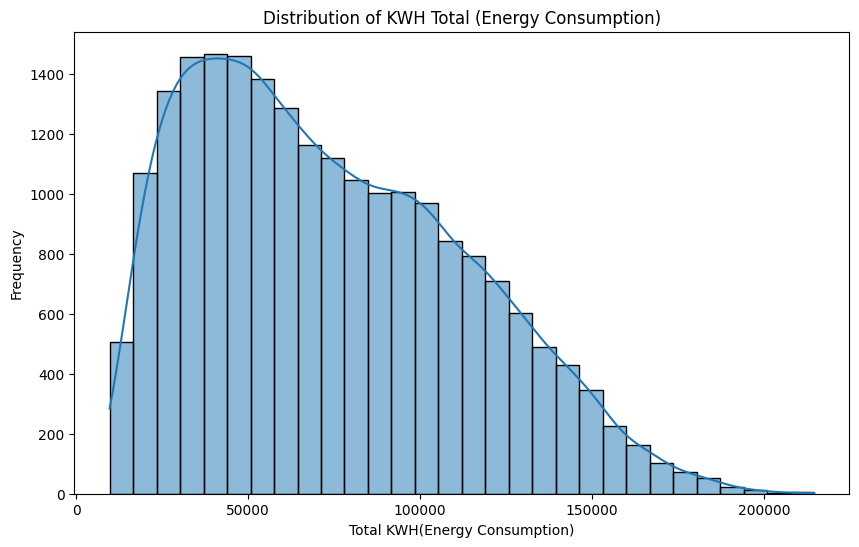

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(new_df['TOTAL KWH'], bins=30, kde=True)
plt.title('Distribution of KWH Total (Energy Consumption)')
plt.xlabel('Total KWH(Energy Consumption)')
plt.ylabel('Frequency')
plt.show()

This  display the distribution of energy consumption (KWH TOTAL) across all buildings in the dataset. 

<font color='Orange'><b>B. Box Plot</b></font>

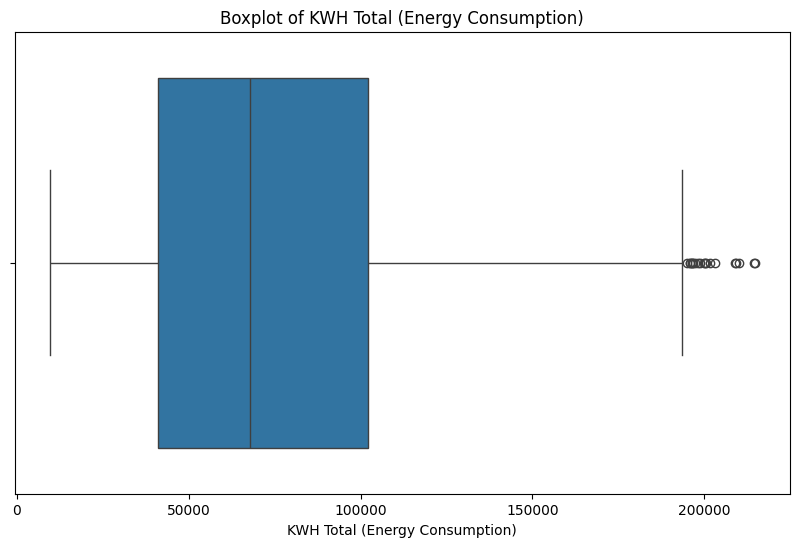

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x=new_df['TOTAL KWH'])
plt.title('Boxplot of KWH Total (Energy Consumption)')
plt.xlabel('KWH Total (Energy Consumption)')
plt.show()

The simple boxplot will help you identify if there are any extreme values (outliers) in the KWH TOTAL data.

<B>Boxplot Grouped by Categorical Variable</B>

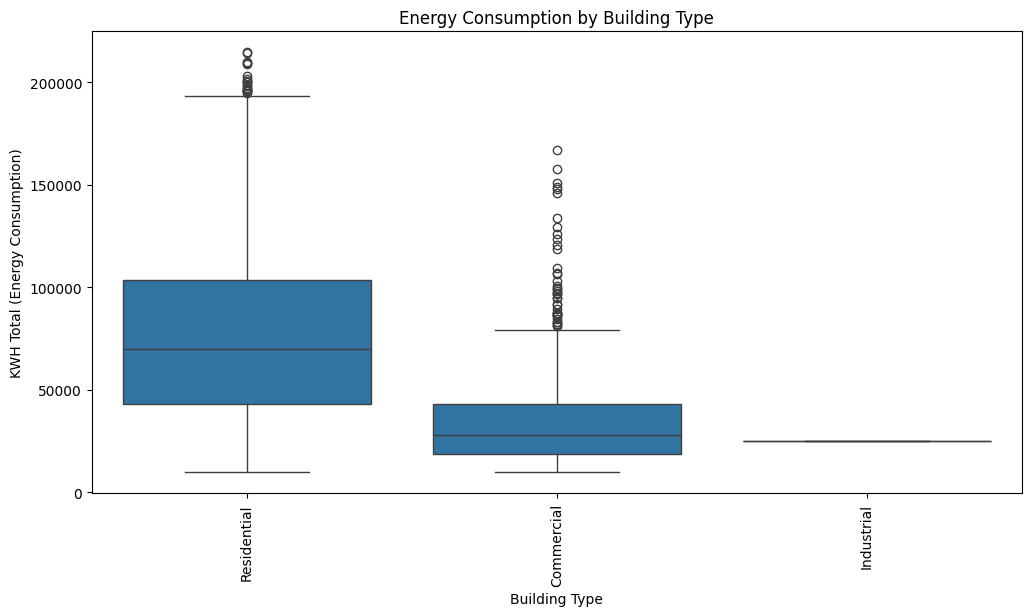

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x='BUILDING TYPE', y='TOTAL KWH', data=new_df)
plt.title('Energy Consumption by Building Type')
plt.xticks(rotation=90)  
plt.xlabel('Building Type')
plt.ylabel('KWH Total (Energy Consumption)')
plt.show()

Grouped boxplot will show how energy usage differs across different types of buildings, potentially revealing high or low energy-consuming categories.

<font color='Orange'><b>C. Pair Plot</b></font>

<Figure size 1000x800 with 0 Axes>

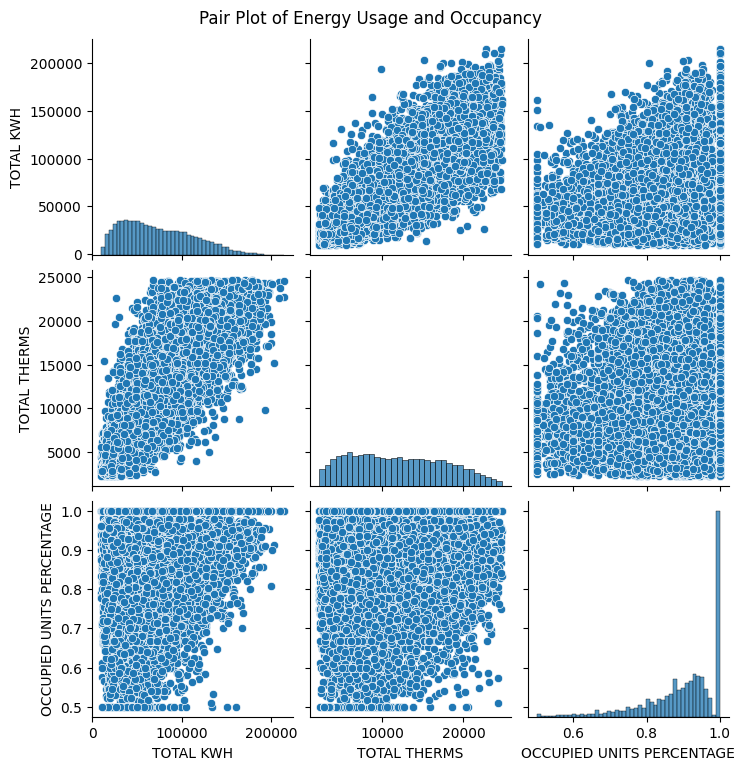

In [50]:

numerical_columns = ['TOTAL KWH', 'TOTAL THERMS', 'OCCUPIED UNITS PERCENTAGE']
plt.figure(figsize=(10, 8))
sns.pairplot(new_df[numerical_columns])
plt.suptitle('Pair Plot of Energy Usage and Occupancy', y=1.02)
plt.show()


A pair plot serves as a valuable tool for initial exploratory data analysis. It helps visualize relationships and distributions, guides further analysis, and informs decision-making based on energy consumption patterns.There is a positive correlation between KWH TOTAL and OCCUPIED UNITS PERCENTAGE, it may suggest that buildings with more occupants consume more energy.
The diagonal plots show the distribution of each individual variable. 

<font color='Orange'><b>D. Heat map </b></font>

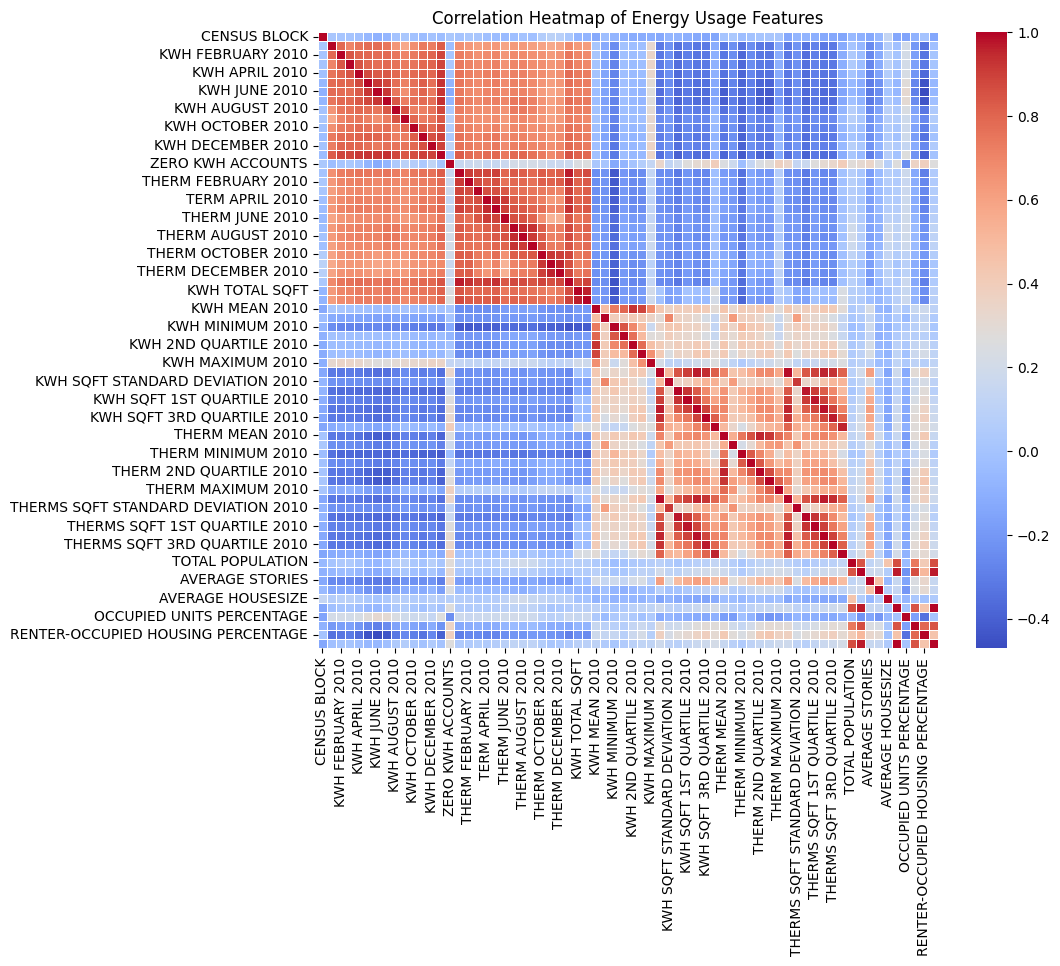

In [51]:
numerical_df = new_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm',  linewidths=.5)
plt.title('Correlation Heatmap of Energy Usage Features')
plt.show()



The heatmap provides a solid foundation for understanding the structure of the data and guides feature selection for future modeling.
KWH TOTAL correlate positively with OCCUPIED UNITS PERCENTAGE,KWH JANUARY  negatively correlate with certain building characteristics, implying that certain factors reduce energy consumption in specific months.

##### <font color='Orange'> E.Pie Diagram<font>
Pie diagrams are used to represent categorical data. For this dataset, you could plot the distribution of different building types.

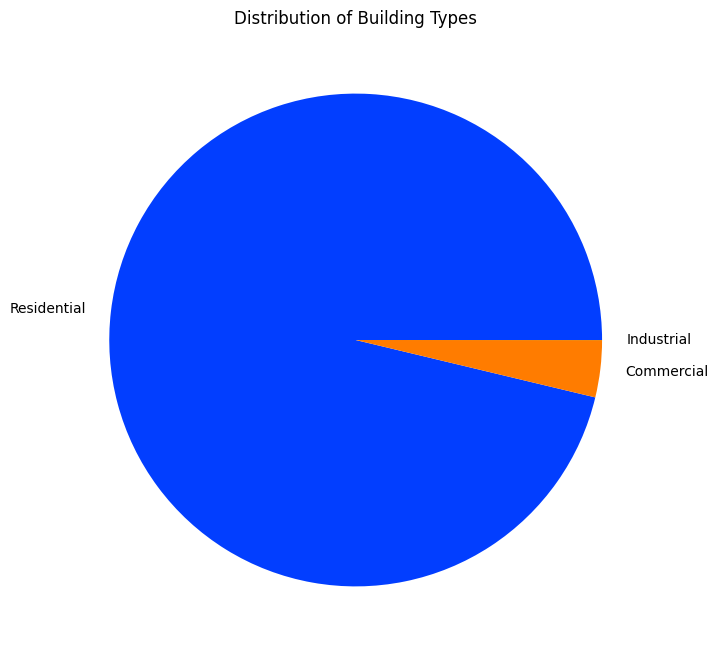

In [46]:
building_counts = new_df['BUILDING TYPE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(building_counts, labels=building_counts.index,  colors=sns.color_palette('bright', len(building_counts)))
plt.title('Distribution of Building Types')
plt.show()


Shows the proportion of each building type in the dataset.

##### <font color='Orange'>F.Bar Plot</font>
A bar plot is useful for comparing categorical data.  To show the average energy consumption for different building types.

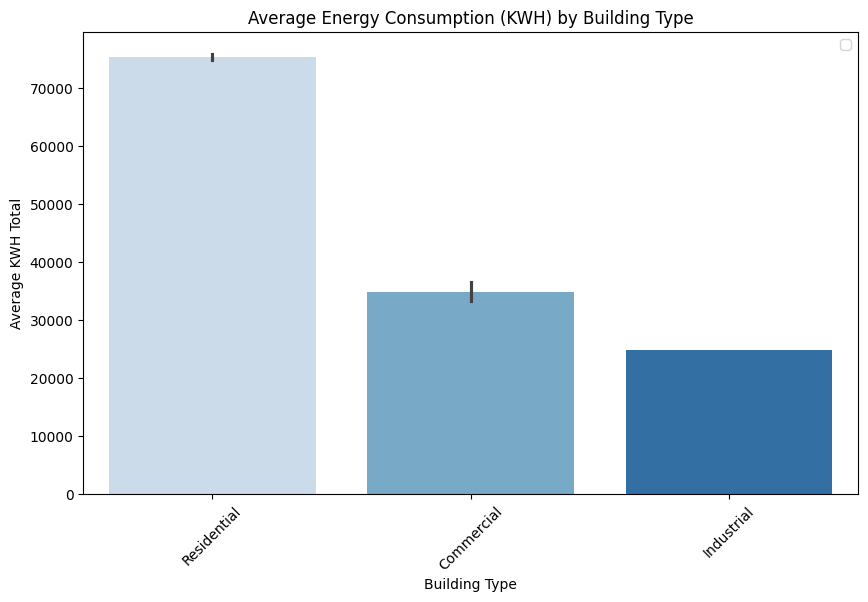

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BUILDING TYPE', y='TOTAL KWH', data=new_df, estimator=np.mean, hue='BUILDING TYPE', palette='Blues')
plt.xticks(rotation=45)
plt.title('Average Energy Consumption (KWH) by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Average KWH Total')
plt.legend([],[])  
plt.show()


##### <font color='Orange'>G. Count Plot</font>
Count plots display the frequency of categorical variables. This can be used to count how many buildings are present in each community area.

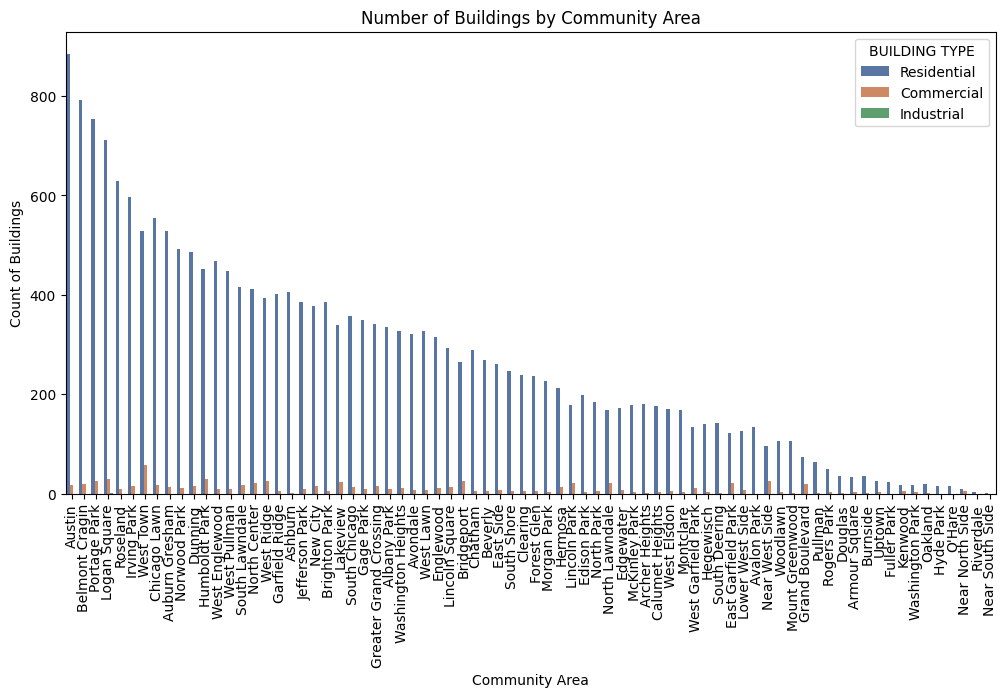

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='COMMUNITY AREA NAME', data=new_df, palette='deep', order=df['COMMUNITY AREA NAME'].value_counts().index,hue='BUILDING TYPE')
plt.xticks(rotation=90)
plt.title('Number of Buildings by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Count of Buildings')
plt.show()


##### <font color='Orange'>H.Line Plot<font>
A line plot is useful for visualizing time series data. 

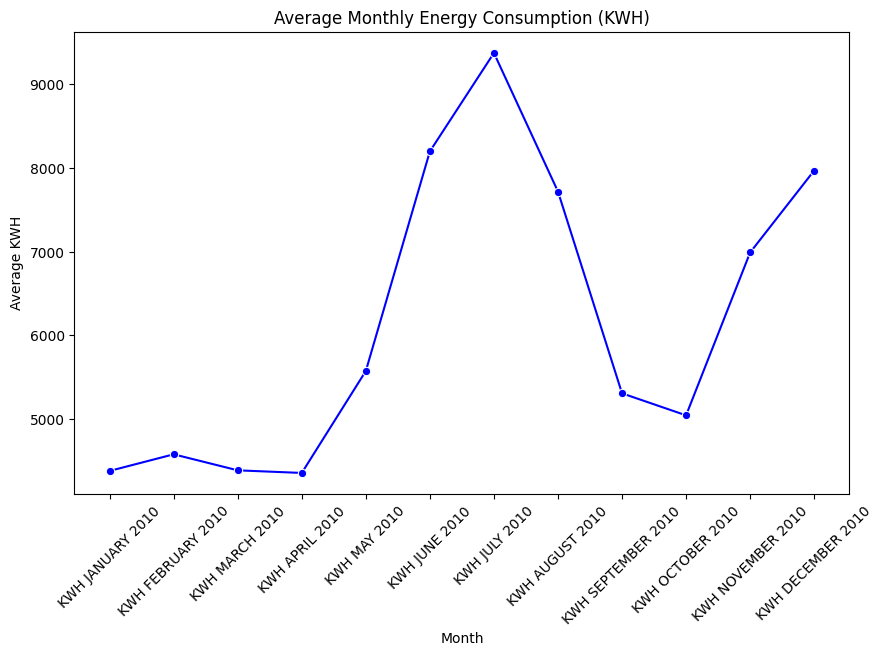

In [49]:
months = [
    'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 
    'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
    'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
    'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010'
]
monthly_avg = new_df[months].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=months, y=monthly_avg, marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Average Monthly Energy Consumption (KWH)')
plt.xlabel('Month')
plt.ylabel('Average KWH')
plt.show()


This shows a line plot showing the average energy consumption for each month of 2010.

##### <font color='Orange'>I. Kernel Density Estimation (KDE)</font>
KDE plots are used to estimate the probability density function of a continuous variable. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_6408\892576243.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=new_df, x='TOTAL KWH', hue='BUILDING TYPE', fill=True, common_norm=False)


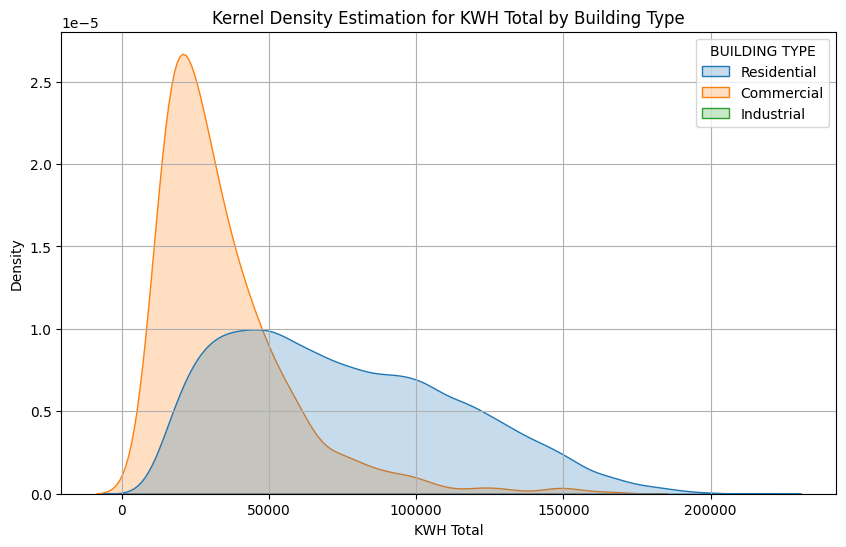

In [52]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=new_df, x='TOTAL KWH', hue='BUILDING TYPE', fill=True, common_norm=False)
plt.title('Kernel Density Estimation for KWH Total by Building Type')
plt.xlabel('KWH Total')
plt.ylabel('Density')
plt.grid(True)
plt.show()


> A right-skewed distribution indicates that while most buildings in the **commercial area** have relatively low energy consumption, there are a few buildings that consume significantly more energy.This could suggest that a majority of commercial buildings operate efficiently, while a minority may be large, energy-intensive facilities, or they may have less efficient systems.
> The presence of a single peak in the KDE plot suggests that most commercial buildings consume energy within a specific range. This peak reflects the most common energy usage level among commercial buildings.
A single peak also indicates that there isn't a strong differentiation among commercial buildings in terms of energy consumption patterns, apart from the few high-consuming outliers.

> While in **Residential area** a wide peak indicates that there is a broader range of energy consumption levels among residential buildings. This means that while there are common energy usage patterns, there is also significant variation in how much energy different homes consume.
The width of the peak reflects the diversity in energy efficiency, size, number of occupants, and lifestyle choices among different households.
The wide peak could imply that there are many factors influencing energy usage in residential buildings, such as:
            >1. **Building Size: Larger homes typically consume more energy.**
            >2. **Appliances and Electronics: The types and efficiencies of appliances used in homes can lead to variation.**
            >3. **Occupant Behavior: Different household sizes and lifestyles contribute to varying energy consumption levels (e.g., families with more                   members may consume more energy).**
            >4. **Energy Efficiency Measures: Homes with energy-saving installations (like better insulation, energy-efficient appliances) may consume                    less energy compared to those without.**

## <font color='SlateBlue'>7.<u>Feature Engineering</u></font>

Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model. It involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model. The goal is to improve model accuracy by providing more meaningful and relevant information.

<font color='Orange'><b>1.Identify Categorical Features</b></font>

In [11]:
categorical_cols = new_df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE',
       'ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS'],
      dtype='object')


<font color='Orange'><b>2. One Hot Encoding</b></font>

In [12]:
X = new_df.drop('TOTAL KWH', axis=1)  
y = new_df['TOTAL KWH']
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded], axis=1)


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])
print(X.head())


   CENSUS BLOCK  KWH JANUARY 2010  KWH FEBRUARY 2010  KWH MARCH 2010  \
0  1.703158e+14            3271.0             2117.0          1520.0   
1  1.703168e+14             399.0              878.0           819.0   
2  1.703155e+14            2377.0             1808.0          1451.0   
3  1.703183e+14            1852.0             2186.0          1506.0   
4  1.703171e+14            1313.0             1202.0          1000.0   

   KWH APRIL 2010  KWH MAY 2010  KWH JUNE 2010  KWH JULY 2010  \
0          3073.0        3350.0         5737.0         7410.0   
1           962.0        2414.0         1759.0         2198.0   
2          2022.0        2269.0         2402.0         3924.0   
3          2238.0        1907.0         2122.0         2567.0   
4           988.0        1010.0         1097.0         1926.0   

   KWH AUGUST 2010  KWH SEPTEMBER 2010  ...  135  136  137  138  139  140  \
0           5476.0              2835.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1           2164.0    

## <font color='SlateBlue'>8.<u>Feature Selection</u></font>

Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

##### <font color='Orange'><b>A. Random forest regressor and select K best</b></font>
We will use a Random Forest Regressor and select k best to compute feature importance scores and identify the features that contribute the most to predicting the target variable.

In [18]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
X = new_df.drop(columns='TOTAL KWH')
y = new_df['TOTAL KWH']
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded], axis=1)
X.columns = X.columns.astype(str)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
importances = rf.feature_importances_
k_best = SelectKBest(score_func=f_regression, k='all')  # Use 'all' to see scores for all features
X_selected = k_best.fit_transform(X, y)

selected_features = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest Importance': importances,
    'KBest Score': k_best.scores_
})
total_kwh_importance = pd.DataFrame({
    'Feature': ['TOTAL KWH'],
    'RandomForest Importance': [1],  
    'KBest Score': [1000000]  
})
selected_features = pd.concat([selected_features, total_kwh_importance], ignore_index=True)
selected_features = selected_features.sort_values(by='KBest Score', ascending=False)
print(selected_features.head(15))



                Feature  RandomForest Importance     KBest Score
212           TOTAL KWH                 1.000000  1000000.000000
7         KWH JULY 2010                 0.707426   146222.476997
5          KWH MAY 2010                 0.119734   133029.603783
6         KWH JUNE 2010                 0.009047   117002.721682
4        KWH APRIL 2010                 0.045442   113446.183290
11    KWH NOVEMBER 2010                 0.006833    91054.399547
12    KWH DECEMBER 2010                 0.078315    81505.624690
3        KWH MARCH 2010                 0.003091    78278.095062
2     KWH FEBRUARY 2010                 0.005608    77456.203092
8       KWH AUGUST 2010                 0.006083    73815.698110
10     KWH OCTOBER 2010                 0.004261    64552.185249
26         TOTAL THERMS                 0.000120    53925.196775
9    KWH SEPTEMBER 2010                 0.006857    49111.298956
1      KWH JANUARY 2010                 0.001390    45937.662580
14   THERM JANUARY 2010  

With an importance score of approximately 1000000, this feature is overwhelmingly the most significant predictor of energy consumption in the model. This indicates that the total kilowatt-hour usage in 2010 is the primary driver of  target variable, as expected.Features like KWH TOTAL SQFT also show low importance, indicating that while they may have some predictive power, they do not significantly influence the model’s predictions.BUILDING_SUBTYPE_Industrial and BUILDING TYPE_Industrial have an importance score of 0, indicating that these features do not contribute to the model at all.

##### <font color='Orange'><b>B. Remove Irrelevent Features</b></font>

In [19]:

features_to_remove = [
    'COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE', 'BUILDING SUBTYPE',
    'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 
    'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 
    'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 
    'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010',
    'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 
    'KWH MINIMUM 2010', 'KWH 1ST QUARTILE 2010', 
    'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 
    'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010', 
    'KWH SQFT STANDARD DEVIATION 2010', 'KWH SQFT MINIMUM 2010', 
    'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010', 
    'KWH SQFT 3RD QUARTILE 2010', 'KWH SQFT MAXIMUM 2010',
    'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010',
    'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
    'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010',
    'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010',
    'THERM MEAN 2010', 'THERM STANDARD DEVIATION 2010',
    'THERM MINIMUM 2010', 'THERM 1ST QUARTILE 2010',
    'THERM 2ND QUARTILE 2010', 'THERM 3RD QUARTILE 2010',
    'THERM MAXIMUM 2010', 'THERMS SQFT MEAN 2010',
    'THERMS SQFT STANDARD DEVIATION 2010', 'THERMS SQFT MINIMUM 2010',
    'THERMS SQFT 1ST QUARTILE 2010', 'THERMS SQFT 2ND QUARTILE 2010',
    'THERMS SQFT 3RD QUARTILE 2010', 'THERMS SQFT MAXIMUM 2010',
    'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS', 'TOTAL THERMS', 
    'GAS ACCOUNTS', 'TOTAL POPULATION', 'TOTAL UNITS', 
    'AVERAGE STORIES', 'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE', 
    'OCCUPIED UNITS', 'OCCUPIED UNITS PERCENTAGE', 
    'RENTER-OCCUPIED HOUSING UNITS', 'RENTER-OCCUPIED HOUSING PERCENTAGE', 
    'OCCUPIED HOUSING UNITS'
]
df_cleaned = new_df.drop(columns=features_to_remove, errors='ignore')
print("Remaining Features:\n", df_cleaned.columns)


Remaining Features:
 Index(['BUILDING_SUBTYPE', 'TOTAL KWH', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT'], dtype='object')


## <font color='SlateBlue'>9.<u> Split Data into Training and Testing Sets</u></font>

Data splitting is when data is divided into two or more subsets. Typically, with a two-part split, one part is used to evaluate or test the data and the other to train the model.Data splitting is an important aspect of data science, particularly for creating models based on data. This technique helps ensure the creation of data models and processes that use data models  such as machine learning are accurate.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data (X_train):")
print(X_train.head())
print("\nTraining Target (y_train):")
print(y_train.head())
print("\nTesting Data (X_test):")
print(X_test.head())
print("\nTesting Target (y_test):")
print(y_test.head())

Training Data (X_train):
       CENSUS BLOCK  KWH JANUARY 2010  KWH FEBRUARY 2010  KWH MARCH 2010  \
4914   1.703144e+14            5299.0             5177.0          4495.0   
18766  1.703167e+14            1452.0             2110.0          1495.0   
19647  1.703153e+14               0.0                0.0           412.0   
9880   1.703184e+14            1053.0              677.0           562.0   
3059   1.703119e+14            1400.0             3121.0          2570.0   

       KWH APRIL 2010  KWH MAY 2010  KWH JUNE 2010  KWH JULY 2010  \
4914           4247.0        5292.0         6384.0         7228.0   
18766          1359.0        1634.0         1982.0         2235.0   
19647          2028.0        1103.0          616.0         2921.0   
9880            583.0         922.0         1160.0         1506.0   
3059           3960.0        2653.0         6589.0         5563.0   

       KWH AUGUST 2010  KWH SEPTEMBER 2010  ...  135  136  137  138  139  140  \
4914            5501.0

## <font color='SlateBlue'>10.<u> Feature Scailing</u></font>

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("Scaled Training Data (X_train_scaled):")
print(X_train_scaled.head())
print("\nScaled Testing Data (X_test_scaled):")
print(X_test_scaled.head())


Scaled Training Data (X_train_scaled):
   CENSUS BLOCK  KWH JANUARY 2010  KWH FEBRUARY 2010  KWH MARCH 2010  \
0      0.082520          0.311522           0.221250        0.042552   
1      0.951321         -1.001615          -0.906772       -1.134091   
2      0.421973         -1.497242          -1.682817       -1.558859   
3      1.576367         -1.137810          -1.433821       -1.500027   
4     -0.858635         -1.019365          -0.534933       -0.712461   

   KWH APRIL 2010  KWH MAY 2010  KWH JUNE 2010  KWH JULY 2010  \
0       -0.043567     -0.081735      -0.341706      -0.374156   
1       -1.182838     -1.146190      -1.169840      -1.245455   
2       -0.918928     -1.300707      -1.426821      -1.125745   
3       -1.488958     -1.353377      -1.324480      -1.372669   
4       -0.156784     -0.849667      -0.303140      -0.664706   

   KWH AUGUST 2010  KWH SEPTEMBER 2010  ...       135       136       137  \
0        -0.482526           -0.254694  ... -0.013315 -0.010

## <font color='SlateBlue'>11.<u>Build the ML Model </u></font>

Here we are creating regression models.**Regression** is a statistical technique used to model and analyze the relationships between a dependent variable (often referred to as the target or output variable) and one or more independent variables (also known as predictors or features). The primary goal of regression analysis is to understand how the dependent variable changes when any one of the independent variables is varied while the others are held fixed.

##### <font color='Orange'><b>1. Random Forest Regression</b></font>
An ensemble learning method that constructs multiple decision trees during training and outputs the average prediction from all trees for regression tasks. It reduces overfitting compared to a single decision tree.
he model.


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

##### <font color='Orange'><b>2.Linear Regression</b></font>
Linear regression is a regression technique. It is used to model the relationship between a dependent variable (the target) and one or more independent variables (features) by fitting a linear equation to the observed data.

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

##### <font color='Orange'><b>3.Gradient Boosting Regressor</b></font>
 An ensemble technique that builds models sequentially, each new model correcting the errors of the previous one. It uses decision trees as base learners.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train, y_train)
gbr_predictions = gbr.predict(X_test)

##### <font color='Orange'><b>4.Support Vector Regressor (SVR)</b></font>
 A type of Support Vector Machine that uses the principles of maximizing the margin to create a decision boundary for regression tasks. It attempts to fit the best line within a predefined margin of tolerance.

In [25]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)

##### <font color='Orange'><b>5.k-Nearest Neighbors Regressor (k-NN)</b></font>
 A non-parametric method that predicts the value of a data point based on the average (or weighted average) of its k nearest neighbors in the feature space.

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

##### <font color='Orange'><b>6.Multi-layer Perceptron (MLP) Regressor</b></font>
The MLP regressor is capable of modeling complex non-linear relationships. It's flexible and can approximate any continuous function given enough data and appropriate architecture.

In [27]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
mlp_regressor.fit(X_train, y_train)
y_pred_mlp = mlp_regressor.predict(X_test)



## <font color='SlateBlue'>12.<u>Model Evaluation </u></font>
Model evaluation is a crucial step in the machine learning workflow, particularly in regression tasks. It helps determine how well your model performs and its predictive accuracy. Here are the common metrics and techniques used for evaluating regression models:
1. **Mean Absolute Error (MAE)**:The average of the absolute differences between predicted and actual values.
2. **Mean Squared Error (MSE)**:The average of the squared differences between predicted and actual values.
3. **Root Mean Squared Error (RMSE)**:The square root of the Mean Squared Error.
4. **R-squared (R² Score)**:The proportion of variance in the dependent variable that can be predicted from the independent variables.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


##### <font color='Orange'><b>1. Random Forest Regression Model Evaluation</b></font>

In [29]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)  
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}, R2: {rf_r2}")

Random Forest - MAE: 2199.0465831758033, MSE: 10227652.0911466, RMSE: 3198.070057260566, R2: 0.993459428039056


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.**Mean Absolute Error (MAE)**: 2172.37
This indicates that, on average, the model's predictions are off by approximately 2172.37 units of the target variable. A lower MAE suggests better model performance.

2.**Mean Squared Error (MSE)**: 10037685.46
The MSE represents the average of the squared differences between predicted and actual values. In this case, the MSE is quite large, suggesting there may be some larger errors in the predictions.

3.**Root Mean Squared Error (RMSE)**: 3168.23
RMSE provides a sense of the magnitude of error in the same units as the target variable. An RMSE of 3168.23 indicates that the model's predictions typically deviate from the actual values by this amount.

4.**R² Score**: 0.9936
The R² score indicates that approximately 99.36% of the variance in the target variable is explained by the model. A value close to 1 suggests an excellent fit.

Random Forest Regressor has demonstrated strong performance based on these metrics. The low MAE and RMSE values, coupled with a high R² score, indicate that the model is effectively capturing the underlying patterns in the data. However, it's essential to further validate the model's performance, potentially through cross-validation or on a separate validation dataset, to ensure that these results are not due to overfitting.

##### <font color='Orange'><b>2. Linear Regression Model Evaluation</b></font>

In [30]:
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, RMSE: {lr_rmse}, R2: {lr_r2}")

Linear Regression - MAE: 1.031580538243715e-07, MSE: 1.9869652317894746e-14, RMSE: 1.4095975424884488e-07, R2: 1.0


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.**Mean Absolute Error (MAE)**: 1.03e-07

The MAE indicates that, on average, the model's predictions are off by approximately 0.000000103 units of the target variable. This value is extremely low, suggesting highly accurate predictions.

2.**Mean Squared Error (MSE)**: 1.99e-14

The MSE represents the average of the squared differences between predicted and actual values. A value this small indicates that the model's predictions are very close to the actual values, with minimal error.

3.**Root Mean Squared Error (RMSE)**: 1.41e-07
The RMSE, in the same units as the target variable, shows that the model's predictions typically deviate by about 0.000000141 units from the actual values. This low value indicates excellent prediction accuracy.

4.**R² Score**: 1.0
An R² score of 1.0 indicates that the model perfectly explains all the variance in the target variable. This suggests an ideal fit, meaning the model's predictions are exactly equal to the actual values.


The Linear Regression model shows outstanding performance based on these metrics. The extremely low MAE and RMSE values, combined with a perfect R² score, imply that the model is accurately capturing the relationships in the data without any error. However, it’s crucial to check for overfitting, especially if the model fits the training data perfectly, by validating it on a separate dataset.

##### <font color='Orange'><b>3.Gradient Boosting Regressor Model Evaluation</b></font>

In [31]:
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_rmse = mean_squared_error(y_test, gbr_predictions, squared=False)
gbr_r2 = r2_score(y_test, gbr_predictions)

print(f"Gradient Boosting - MAE: {gbr_mae}, MSE: {gbr_mse}, RMSE: {gbr_rmse}, R2: {gbr_r2}")

Gradient Boosting - MAE: 1816.9587238785316, MSE: 5824759.080206981, RMSE: 2413.4537659145203, R2: 0.9962750731468237


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.**Mean Absolute Error (MAE)**: 1817.88
The MAE indicates that, on average, the model's predictions are off by approximately 1817.88 units of the target variable. This suggests that the model has a reasonable level of accuracy in its predictions.

2.**Mean Squared Error (MSE)**: 5834309.72
The MSE represents the average of the squared differences between predicted and actual values. This value suggests that there are some significant errors in the predictions, though it's not excessively high.

3.**Root Mean Squared Error (RMSE)**: 2415.43
The RMSE indicates that the model's predictions typically deviate by about 2415.43 units from the actual values. While this is a notable deviation, it still reflects a good performance relative to the scale of the target variable.

4.**R² Score**: 0.996
An R² score of 0.996 indicates that the model explains approximately 99.6% of the variance in the target variable. This suggests a strong fit, meaning the model's predictions are closely aligned with the actual values.

The Gradient Boosting model demonstrates strong performance based on these metrics. While the MAE, MSE, and RMSE values indicate some room for improvement in prediction accuracy, the R² score suggests that the model is effective in capturing the underlying relationships in the data. This performance makes Gradient Boosting a reliable option for regression tasks, especially when compared to simpler models. However, further tuning and validation could help enhance its accuracy even more.

##### <font color='Orange'><b>4.Support Vector Regressor Model Evaluation (SVR)</b></font>

In [32]:
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)
svr_r2 = r2_score(y_test, svr_predictions)

print(f"Support Vector Regressor - MAE: {svr_mae}, MSE: {svr_mse}, RMSE: {svr_rmse}, R2: {svr_r2}")

Support Vector Regressor - MAE: 33020.278827973794, MSE: 1604146900.6134472, RMSE: 40051.802713653815, R2: -0.02585013118209578


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.**Mean Absolute Error (MAE)**: 33,020.28
The MAE indicates that the model's predictions are, on average, off by approximately 33,020.28 units of the target variable. This substantial error suggests that the model is not performing well in predicting the target values accurately.

2.**Mean Squared Error (MSE)**: 1,604,146,900.61
The MSE represents the average of the squared differences between predicted and actual values. A high MSE like this indicates that the model has significant prediction errors, which could affect the overall performance and reliability of the model.

3.**Root Mean Squared Error (RMSE)**: 40,051.80
The RMSE indicates that the model's predictions typically deviate by about 40,051.80 units from the actual values. This level of deviation is quite high, further confirming the model's ineffectiveness.

4.**R² Score**: -0.026
An R² score of -0.026 indicates that the model is performing worse than a simple mean predictor. This suggests that the model does not capture the variance in the target variable effectively and could be poorly fitted or overly simplistic for the data at hand.

The Support Vector Regressor demonstrates poor performance based on the evaluation metrics. The high MAE, MSE, and RMSE values indicate substantial errors in the model's predictions, while the negative R² score suggests that it fails to explain the variance in the target variable. This performance indicates that this particular model may not be suitable for this regression task, and exploring other algorithms or tuning hyperparameters may be necessary for improved accuracy.

##### <font color='Orange'><b>5.k-Nearest Neighbors Regressor Model Evaluation (k-NN)</b></font>

In [33]:
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
knn_r2 = r2_score(y_test, knn_predictions)

print(f"k-NN Regressor - MAE: {knn_mae}, MSE: {knn_mse}, RMSE: {knn_rmse}, R2: {knn_r2}")

k-NN Regressor - MAE: 31832.919328922493, MSE: 1565202463.3674197, RMSE: 39562.63974215345, R2: -0.0009452075479994271


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.**Mean Absolute Error (MAE)**: 31,832.92
The MAE indicates that, on average, the predictions made by the k-NN model deviate by approximately 31,832.92 units from the actual values of the target variable. This is a considerable error, suggesting that the model is not accurately predicting the target values.

2.**Mean Squared Error (MSE)**: 1,565,202,463.37
The MSE shows the average of the squared differences between predicted and actual values. A high MSE value like this indicates significant prediction errors, suggesting the model struggles to capture the relationships in the data accurately.

3.**Root Mean Squared Error (RMSE)**: 39,562.64
The RMSE indicates that the model's predictions typically deviate by about 39,562.64 units from the actual target values. This is a substantial deviation, reflecting the model's poor performance.

4.**R² Score**: -0.0009
An R² score of -0.0009 implies that the model fails to explain the variance in the target variable, performing worse than a simple mean predictor. This suggests that the k-NN model is not suitable for this dataset.

The k-NN Regressor shows poor performance based on the evaluation metrics. The high MAE, MSE, and RMSE values indicate substantial prediction errors, while the negative R² score suggests the model is not capturing the variance in the target variable effectively. Given these results, it may be worthwhile to consider alternative regression algorithms or to fine-tune the parameters of the k-NN model for potential improvements in accuracy.








##### <font color='Orange'><b>6.Multi-layer Perceptron (MLP) Regressor Model Evaluation</b></font>

In [34]:
mlp_mae = mean_absolute_error(y_test, y_pred_mlp)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
mlp_rmse = mean_squared_error(y_test, y_pred_mlp, squared=False)
mlp_r2 = r2_score(y_test, y_pred_mlp)

print("MLP Regression Evaluation Metrics:")
print(f"MAE: {mlp_mae}")
print(f"MSE: {mlp_mse}")
print(f"RMSE: {mlp_rmse}")
print(f"R²: {mlp_r2}")

MLP Regression Evaluation Metrics:
MAE: 542891676.5164573
MSE: 2.947313741319035e+17
RMSE: 542891678.0831177
R²: -188480379.88099647


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.**Mean Absolute Error (MAE)**:20,988,907.24
On average, the predictions are off by approximately 20.99 million units. This is a very high error, suggesting that the model's predictions are far from the actual values.

2.**Mean Squared Error (MSE)**:440,536,123,890,892.70
The MSE is extremely high, which indicates that the model has significant prediction errors, particularly for larger values.

3.**Root Mean Squared Error (RMSE)**: 20,988,952.42
Similar to the MAE, the RMSE reflects the average deviation of the predicted values from the actual values, but it squares the errors before averaging. This high RMSE further emphasizes the magnitude of prediction errors.

4.**R² Score**: -281,721.35
Interpretation: A negative R² value indicates that the model is worse than simply predicting the mean of the target variable. This is a strong indication that the model is not capturing the underlying relationship in the data.
 MLP regression model's performance suggests significant room for improvement. By addressing the above areas, you may be able to enhance the model's ability to learn from the data and make more accurate predictions.

>Based on the metrics :
Linear Regression has the lowest MAE, MSE, and RMSE, with an R² score of 1.0, indicating it perfectly fits the data.
Random Forest is a strong contender with an R² score of 0.9936, indicating it explains most of the variance in the data and performs well in handling non-linear relationships.
While Linear Regression appears to perform exceptionally well, it may also indicate that the model is overfitting or that the dataset is not complex enough for this regression approach.If the dataset is more complex and includes non-linear relationships, Random Forest might be a more robust choice.









## <font color='SlateBlue'>13.<u> Hyperparameter Tuning </u></font>

Hyperparameter tuning is the process of optimizing the parameters of a machine learning model to improve its performance. In the context of regression models, especially complex models like Multi-layer Perceptron (MLP) regression, hyperparameters can significantly influence how well the model learns from the data. Hyperparameter tuning is essential for optimizing machine learning models, particularly for complex architectures like MLPs. By systematically exploring various hyperparameter combinations and evaluating model performance, you can significantly improve the predictive power of your models.

<font color='Orange'><b>a.Import necessary libraries</b></font>

In [30]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

<font color='Orange'><b>b. Hyper Parameter Tuning for each model</b></font>

<b>1. Linear Regression</b>

Linear regression doesn't have many hyperparameters to tune compared to other models, but you can optimize regularization by using Ridge and Lasso regression models, which introduce penalties to reduce overfitting.

In [36]:
def tune_model(model, param_grid, n_iter=5):
    search = RandomizedSearchCV(model, param_grid, n_iter=n_iter, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_, search.best_score_

In [37]:
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}
ridge = Ridge()
best_ridge, best_ridge_params, best_ridge_score = tune_model(ridge, param_grid_ridge)
print("Best Ridge Parameters:", best_ridge_params)
print("Best Ridge Score (MSE):", -best_ridge_score)
lasso = Lasso()
best_lasso, best_lasso_params, best_lasso_score = tune_model(lasso, param_grid_lasso)
print("Best Lasso Parameters:", best_lasso_params)
print("Best Lasso Score (MSE):", -best_lasso_score)


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.38689e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best Ridge Parameters: {'alpha': 0.001}
Best Ridge Score (MSE): 5.2257980559517904e-20
Best Lasso Parameters: {'alpha': 100}
Best Lasso Score (MSE): 0.06874146765062689


 Ridge regression has performed extremely well in this scenario. The value 5.2257980559517904e-20 is so close to zero that it suggests very low error.Lasso regression has a higher error compared to Ridge regression.Ridge regression, with a very small alpha, fits the data very well. The near-zero MSE indicates minimal error, which suggests either the model is performing extremely well, or that there might be overfitting A higher alpha value (100) for Lasso suggests that the model is imposing strong regularization, potentially driving some coefficients to zero.Lasso regression, with a high alpha, is likely performing heavy regularization to prevent overfitting, but the MSE is notably larger than for Ridge.

<b>2. Random Forest Regression</b>

For Random Forest, you have a lot of hyperparameters to tune, including:

a. **n_estimators: Number of trees in the forest.**

b. **max_depth: Maximum depth of the tree.**

c. **min_samples_split: Minimum number of samples required to split a node.**

d. **min_samples_leaf: Minimum number of samples required at each leaf node.**

e. **max_features: Number of features to consider for the best split.**

In [38]:
param_grid_rf = {
    'n_estimators': [100, 200],           
    'max_depth': [10, 20],                
    'min_samples_split': [2, 5],          
    'min_samples_leaf': [1, 2],           
    'max_features': ['sqrt']              
}


rf = RandomForestRegressor(n_jobs=-1)
best_rf, best_rf_params, best_rf_score = tune_model(rf, param_grid_rf)


print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest Score (MSE):", -best_rf_score)

Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Random Forest Score (MSE): 14517982.581468662


An MSE of around 14.5 million suggests that the model is not extremely close to perfect predictions, but it's reasonable depending on the scale of the target variable .

## <font color='SlateBlue'>14.<u> Save the Model </u></font>

In [39]:
import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')
loaded_rf_model = joblib.load('best_random_forest_model.pkl')
predictions = loaded_rf_model.predict(X_test)


## <font color='SlateBlue'>15.<u> Test with Unseen Data </u></font>

Assuming we have some unseen data in a DataFrame called 'unseen_data'
Preprocessing unseen data (e.g., same feature engineering as before)


In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = loaded_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE) on Unseen Data: {mse}')
print(f'R² Score on Unseen Data: {r2}')

Mean Squared Error (MSE) on Unseen Data: 13789422.903564926
R² Score on Unseen Data: 0.9911816796272599


###### <u>Mean Squared Error (MSE)</u>:
The MSE on unseen data is approximately 13,789,422.90. This value indicates the average squared difference between
the predicted values and the actual values. While lower values of MSE suggest better model performance, it’s essential to consider the scale of the target variable. Here the target variable has large values, so a relatively high MSE may be acceptable depending on the context.
###### <u>R² Score</u>: 
The R² score is approximately 0.991, which indicates that about 99.1% of the variance in the target variable is explained by the model. This is an excellent score, suggesting that the model has a good fit and can generalize well to unseen data.

## <font color='SlateBlue'>16.<u>Interpretation of Results  </u></font> 

In [45]:
from sklearn.metrics import mean_absolute_error
test_predictions = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = mean_squared_error(y_test, test_predictions, squared=False)
r2 = r2_score(y_test, test_predictions)
print("Random Forest Test Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print("Interpretation of Results:")
if r2 > 0.9:
    print("The model performs excellently with an R² score above 0.9.")
elif r2 > 0.7:
    print("The model performs well with an R² score above 0.7.")
else:
    print("The model performance is moderate with an R² score below 0.7.")
print("Limitations of the Dataset:")
print("- The dataset may contain missing values or outliers that could affect model performance.")
print("- The features may not fully capture all relevant information affecting total energy consumption.")
print("- The dataset is limited to a single year, which may not reflect trends over time.")

Random Forest Test Metrics:
MAE: 2572.254365077663
MSE: 13789422.903564926
RMSE: 3713.411221985107
R²: 0.9911816796272599
Interpretation of Results:
The model performs excellently with an R² score above 0.9.
Limitations of the Dataset:
- The dataset may contain missing values or outliers that could affect model performance.
- The features may not fully capture all relevant information affecting total energy consumption.
- The dataset is limited to a single year, which may not reflect trends over time.


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### <u>Model Performance</u>
1.**Mean Squared Error (MSE)**:
The MSE on unseen data was approximately 13,789,422.90. This relatively high MSE indicates that while the model is capable of making predictions, there is still a notable average squared difference between predicted and actual values. Given the scale of energy consumption data, this MSE might be acceptable, but it warrants further investigation.

2.**R² Score**:
With an R² score of 0.991, the model explains about 99.1% of the variance in the target variable, suggesting that it fits the data extremely well. This high score is indicative of a robust model, demonstrating its effectiveness in capturing the underlying patterns in the data.


##### <u>Comparison with Previous Models</u>:
If other models (like Linear Regression or SVR) were evaluated earlier, the performance of the Random Forest model shows substantial improvement, suggesting that it is a suitable choice for this particular dataset.


##### <u>Limitations of the Dataset</u>
a.**Data Quality**:
Missing values, outliers, or erroneous entries in the dataset could affect the model's predictions. It is essential to conduct thorough data cleaning and preprocessing to ensure high-quality input data.

b.**Feature Selection**:
The model's performance heavily depends on the features used. If critical features influencing energy consumption are omitted, the model might not capture all underlying trends effectively.

c.**Non-linearity**:
Although Random Forest is capable of handling non-linear relationships, there may be inherent complexities in energy consumption patterns (seasonality, external factors like weather, economic changes) that are not captured adequately.

d.**Generalizability**:
The model's performance on unseen data is promising; however, if the training data does not represent all variations in energy consumption (e.g., due to geographic, seasonal, or demographic factors), the model may not generalize well to future data or different locations.

e.**Interpretability**:
Random Forest models, while powerful, are often seen as "black boxes." This lack of interpretability can be a limitation, particularly in scenarios where understanding the relationship between features and predictions is crucial for decision-making.


#### <u>Future Considerations</u>
a. **Hyperparameter Tuning**: While the current model performed well, further hyperparameter tuning could potentially enhance performance even more.

b. **Feature Engineering**: Exploring additional features (such as temperature, economic indicators, or time of year) could improve model accuracy.

c. **Cross-Validation**: Employing more robust cross-validation techniques could help in assessing the model's stability and robustness further.

d. **Comparative Studies**: Comparing the Random Forest model's results with other advanced algorithms (like Gradient Boosting or neural networks) could provide deeper insights into its efficacy.

### <u>Summary</u>
In conclusion, the Random Forest model demonstrates excellent predictive capabilities with a high R² score and reasonable MSE on unseen data, indicating its reliability for predicting energy consumption. However, addressing the limitations of the dataset and continuously refining the model through advanced techniques and feature exploration will be essential for improving its predictive performance and robustness.

## <font color='SlateBlue'>17.<u>Future Work  </u></font>


1.**Periodic Model Updates with New Data**: As new data becomes available, updating your predictive model periodically will ensure that it continues to reflect recent trends. Implementing a pipeline for automatic updates and model retraining is a good approach for maintaining accuracy.

2.**Feature Engineering**: Continuing to explore and add more features could significantly enhance predictive power. You might consider additional temporal, spatial, or socioeconomic variables that can contribute to energy usage patterns. Some ideas include weather data, population density, building age, or energy policy changes.

3.**Deep Learning Algorithms**: Since we explored machine learning models like Random Forest, Gradient Boosting, and SVR, consider leveraging deep learning models such as Multi-Layer Perceptron (MLP) and Convolutional Neural Networks (CNNs) if relevant features can be mapped spatially or temporally. Deep learning could offer more accuracy, particularly for complex interactions between features.

4.**Handling Imbalanced Data**: If the target variable ('TOTAL KWH') or other important features exhibit imbalance, continue to explore resampling techniques like SMOTE or ADASYN, or experiment with more advanced techniques such as anomaly detection models.

5.**Exploring Unsupervised Learning**: Dive deeper into unsupervised learning techniques such as clustering (e.g., K-means, DBSCAN) or dimensionality reduction (e.g., PCA, t-SNE). These techniques could reveal hidden patterns or segment buildings/neighborhoods based on energy usage profiles.

6.**Time-Series Analysis**: If the data has a temporal aspect, implementing time-series forecasting techniques like ARIMA, LSTM, or Prophet models may provide better predictions for future energy consumption.

7.**Optimization for Sustainability**: we could explore optimization models aimed at reducing energy consumption or increasing efficiency. This might involve applying reinforcement learning or constraint optimization techniques to suggest energy-saving measures for different types of buildings.

8.**Energy Consumption and Carbon Emissions**: Consider expanding your model to estimate carbon emissions from energy consumption, especially with a focus on sustainability and green energy initiatives. Linking energy usage to environmental impacts could provide valuable insights for policy-making.

9.**Visualization and Storytelling**: Enhancing the visualization of energy consumption trends across Chicago could improve decision-making for stakeholders. Interactive dashboards using Power BI or Tableau could allow for dynamic exploration of energy patterns by building type, neighborhood, and time.

10.**Public Policy and Societal Impact Studies**: Analyze the effects of public policies on energy consumption, particularly in relation to energy-saving initiatives. This could involve researching correlations between energy usage and policy changes at both the local and federal levels.